## Import nessery packges and utilitary functions 

In [1]:
from elecrophy import *
import myokit
from map import *
import numpy as np
import matplotlib.pyplot as plt

## Chekc basic functional

In [2]:
import numpy as np

def make_isodomain_map(nx, ny, gx=771, gy=771):
    return np.ones((nx, ny-1)) * gx, np.ones((nx-1, ny)) * gy


def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx]



def find_bounds(ctags):
    x_bounds = (np.diff(ctags, axis=1) == 0).astype('uint8')
    y_bounds = (np.diff(ctags, axis=0) == 0).astype('uint8')
    
    return x_bounds, y_bounds


def find_contacts(contacts):
    x_contacts = (np.diff(contacts, axis=1) != 0).astype('uint8')
    y_contacts = (np.diff(contacts, axis=0) != 0).astype('uint8')
    
    return x_contacts, y_contacts


def find_cms(ctags, types):
    x_cms = np.zeros((ctags.shape[0], ctags.shape[1] - 1))
    y_cms = np.zeros((ctags.shape[0] - 1, ctags.shape[1]))
    
    for i in range(ctags.shape[0]):
        for j in range(ctags.shape[1] - 1):
            if types[ctags[i, j+1]] - types[ctags[i, j]] == 0 and types[ctags[i, j]] == 1 and ctags[i, j] > 0:
                x_cms[i, j] = 1
    
    for i in range(ctags.shape[0] - 1):
        for j in range(ctags.shape[1]):
            if types[ctags[i+1, j]] - types[ctags[i, j]] == 0 and types[ctags[i, j]] == 1 and ctags[i, j] > 0:
                y_cms[i, j] = 1
                
    return x_cms, y_cms


def make_potts_map(ctags_path='/home/andrey/kel_myokit_potts/VCT_corner2/VCT/output/ctags3000.out',
                   conts_path='/home/andrey/kel_myokit_potts/VCT_corner2/VCT/output/contactM3000.out', 
                   types_path='/home/andrey/kel_myokit_potts/VCT_corner2/VCT/output/types.out',
                  g_in=771, g_gap=500, g_bound=10, size_x=1500, size_y=1500):
    ctags = crop_center(np.loadtxt(ctags_path), size_x, size_y).astype('uint32')
    conts = crop_center(np.loadtxt(conts_path),  size_x, size_y).astype('uint32')
    types = np.loadtxt(types_path)
    print(types)
                   
    bound_mask_x = (np.diff(ctags, axis=1) != 0).astype('uint8')
    bound_mask_y = (np.diff(ctags, axis=0) != 0).astype('uint8')
    
    
    #x_cm, y_cm = find_cms(ctags, types)
    x_b, y_b = find_bounds(ctags)
    x_cm, y_cm = find_cms(ctags, types)
    x_cont, y_cont = find_contacts(conts)
    
    gx = x_b * g_in * x_cm + g_gap * x_cont * (x_b == 0).astype('uint8') + (x_b == 0).astype('uint8') * g_bound
    gy = y_b * g_in * y_cm + g_gap * y_cont * (y_b == 0).astype('uint8') + (y_b == 0).astype('uint8') * g_bound

    #gx = bound_mask_x * g_in * x_cm + g_gap * x_cont * (x_b == 0).astype('uint8') + 
    #(x_b == 0).astype('uint8') * g_bound
    #gy = bound_mask_y * g_in * y_cm + g_gap * y_cont * (y_b == 0).astype('uint8') + 
    #(y_b == 0).astype('uint8') * g_bound
    return gx, gy   


In [3]:
path='/home/andrey/kel_myokit_potts/VCT_2905/VCT/output'
# d20_path='/home/andrey/kel_myokit_potts/IPSC/0.35/do'

In [4]:
day_path=path

In [5]:
gx, gy = make_potts_map(ctags_path=day_path+'/ctags2000.out',
                   conts_path=day_path+'/contactM2000.out', 
                   types_path=day_path+'/types.out',
                        g_in=1000, g_gap=500, g_bound=5, size_x=300, size_y=300)
len(gx[gx == 550]) , len(gx[gx == 1271]) , len(gx[gx == 771]) , len(gx[gx == 0])

[1. 1. 1. ... 1. 1. 1.]


(0, 0, 0, 0)

In [6]:
ctags = crop_center(np.loadtxt(day_path+'/ctags2000.out'),
                    300, 300).astype('uint32')
conts = crop_center(np.loadtxt(day_path+'/contactM2000.out'),
                    300, 300).astype('uint32')
types = np.loadtxt(day_path+'/types.out')

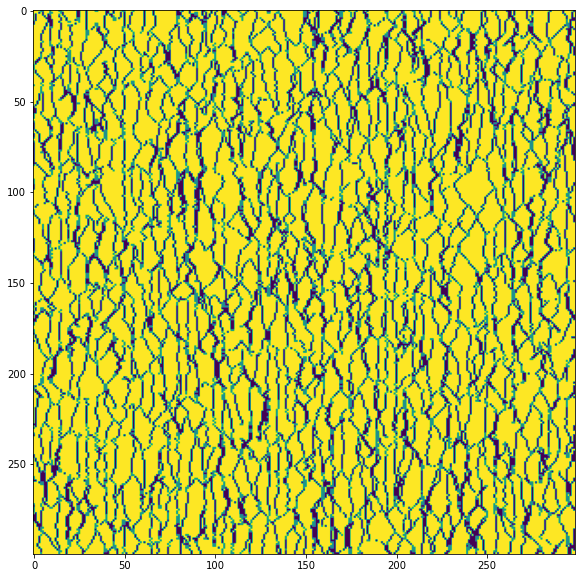

In [7]:
plt.figure(figsize = (10,10))
plt.imshow(gx, aspect=1)

In [8]:
model = myokit.load_model('atrial_test_2.mmt')
protocol = make_protocol(1, 1, 10, 350, 10)
simulation = make_simulation(model, protocol, gx, gy, npixels=(300, 300), step_size=0.005)

In [9]:
result = run_simulation(simulation, protocol, time=500, log_interval=1, paced_y=100, paced_x=100)
visual(result, 'membrane.V', path=f'./results_2905_gb5_corner_0')

result = run_simulation(simulation, protocol, time=500, log_interval=1, paced_y=100, paced_x=100)
visual(result, 'membrane.V', path=f'./results_2905_gb5_corner_1')

result = run_simulation(simulation, protocol, time=500, log_interval=1, paced_y=100, paced_x=100)
visual(result, 'membrane.V', path=f'./results_2905_gb5_corner_2')

result = run_simulation(simulation, protocol, time=500, log_interval=1, paced_y=100, paced_x=100)
visual(result, 'membrane.V', path=f'./results_2905_gb5_corner_3')

[0.0 minutes] 1.0 % done, estimated 47 seconds remaining
[0.0 minutes] 2.0 % done, estimated 43 seconds remaining
[0.0 minutes] 3.0 % done, estimated 42 seconds remaining
[0.0 minutes] 4.0 % done, estimated 41 seconds remaining
[0.0 minutes] 5.0 % done, estimated 40 seconds remaining
[0.0 minutes] 6.0 % done, estimated 40 seconds remaining
[0.0 minutes] 7.0 % done, estimated 39 seconds remaining
[0.1 minutes] 8.0 % done, estimated 39 seconds remaining
[0.1 minutes] 9.0 % done, estimated 38 seconds remaining
[0.1 minutes] 10.0 % done, estimated 38 seconds remaining
[0.1 minutes] 11.0 % done, estimated 37 seconds remaining
[0.1 minutes] 12.0 % done, estimated 37 seconds remaining
[0.1 minutes] 13.0 % done, estimated 36 seconds remaining
[0.1 minutes] 14.0 % done, estimated 36 seconds remaining
[0.1 minutes] 15.0 % done, estimated 36 seconds remaining
[0.1 minutes] 16.0 % done, estimated 35 seconds remaining
[0.1 minutes] 17.0 % done, estimated 35 seconds remaining
[0.1 minutes] 18.0 % do

[0.3 minutes] 45.0 % done, estimated 24 seconds remaining
[0.3 minutes] 46.0 % done, estimated 24 seconds remaining
[0.3 minutes] 47.0 % done, estimated 23 seconds remaining
[0.3 minutes] 48.0 % done, estimated 23 seconds remaining
[0.4 minutes] 49.0 % done, estimated 22 seconds remaining
[0.4 minutes] 50.0 % done, estimated 22 seconds remaining
[0.4 minutes] 51.0 % done, estimated 21 seconds remaining
[0.4 minutes] 52.0 % done, estimated 21 seconds remaining
[0.4 minutes] 53.0 % done, estimated 20 seconds remaining
[0.4 minutes] 54.0 % done, estimated 20 seconds remaining
[0.4 minutes] 55.0 % done, estimated 20 seconds remaining
[0.4 minutes] 56.0 % done, estimated 19 seconds remaining
[0.4 minutes] 57.0 % done, estimated 19 seconds remaining
[0.4 minutes] 58.0 % done, estimated 18 seconds remaining
[0.4 minutes] 59.0 % done, estimated 18 seconds remaining
[0.4 minutes] 60.0 % done, estimated 17 seconds remaining
[0.4 minutes] 61.0 % done, estimated 17 seconds remaining
[0.5 minutes] 

[0.7 minutes] 89.0 % done, estimated 5 seconds remaining
[0.7 minutes] 90.0 % done, estimated 4 seconds remaining
[0.7 minutes] 91.0 % done, estimated 4 seconds remaining
[0.7 minutes] 92.0 % done, estimated 4 seconds remaining
[0.7 minutes] 93.0 % done, estimated 3 seconds remaining
[0.7 minutes] 94.0 % done, estimated 3 seconds remaining
[0.7 minutes] 95.0 % done, estimated 2 seconds remaining
[0.7 minutes] 96.0 % done, estimated 2 seconds remaining
[0.7 minutes] 97.0 % done, estimated 1 seconds remaining
[0.7 minutes] 98.0 % done, estimated 1 seconds remaining
[0.7 minutes] 99.0 % done, estimated 0 seconds remaining
[0.7 minutes] 100.0 % done, estimated 0 seconds remaining
[0.0 minutes] 1.0 % done, estimated 48 seconds remaining
[0.0 minutes] 2.0 % done, estimated 45 seconds remaining
[0.0 minutes] 3.0 % done, estimated 43 seconds remaining
[0.0 minutes] 4.0 % done, estimated 42 seconds remaining
[0.0 minutes] 5.0 % done, estimated 42 seconds remaining
[0.0 minutes] 6.0 % done, esti

In [9]:
gx, gy = make_potts_map(ctags_path=day_path+'/ctags2000_0.35.out',
                   conts_path=day_path+'/contactM2000_0.35.out', 
                   types_path=day_path+'/types0.35.out',
                        g_in=1000, g_gap=500, g_bound=20, size_x=1000, size_y=1000)
len(gx[gx == 550]) , len(gx[gx == 1271]) , len(gx[gx == 771]) , len(gx[gx == 0])

[1. 2. 2. ... 1. 2. 1.]


(0, 0, 0, 320990)

In [10]:
ctags = crop_center(np.loadtxt(day_path+'/ctags2000_0.35.out'),
                    1000, 1000).astype('uint32')
conts = crop_center(np.loadtxt(day_path+'/contactM2000_0.35.out'),
                    1000, 1000).astype('uint32')
types = np.loadtxt(day_path+'/types0.35.out')

In [11]:
model = myokit.load_model('atrial_test_2.mmt')
protocol = make_protocol(1, 1, 10, 350, 10)
simulation = make_simulation(model, protocol, gx, gy, npixels=(1000, 1000), step_size=0.005)

In [12]:
result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d20_Vadim_1505_0.35')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d20_Vadim_1505_0.35_1')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d20_Vadim_1505_0.35_2')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d20_Vadim_1505_0.35_3')

[0.1 minutes] 1.7 % done, estimated 4.2 minutes remaining
[0.1 minutes] 3.3 % done, estimated 4.2 minutes remaining
[0.2 minutes] 5.0 % done, estimated 4.1 minutes remaining
[0.3 minutes] 6.7 % done, estimated 4.0 minutes remaining
[0.4 minutes] 8.3 % done, estimated 4.0 minutes remaining
[0.4 minutes] 10.0 % done, estimated 3.9 minutes remaining
[0.5 minutes] 11.7 % done, estimated 3.8 minutes remaining
[0.6 minutes] 13.3 % done, estimated 3.8 minutes remaining
[0.7 minutes] 15.0 % done, estimated 3.7 minutes remaining
[0.7 minutes] 16.7 % done, estimated 3.6 minutes remaining
[0.8 minutes] 18.3 % done, estimated 3.6 minutes remaining
[0.9 minutes] 20.0 % done, estimated 3.5 minutes remaining
[0.9 minutes] 21.7 % done, estimated 3.4 minutes remaining
[1.0 minutes] 23.3 % done, estimated 3.4 minutes remaining
[1.1 minutes] 25.0 % done, estimated 3.3 minutes remaining
[1.2 minutes] 26.7 % done, estimated 3.2 minutes remaining
[1.2 minutes] 28.3 % done, estimated 3.1 minutes remaining
[1

[1.5 minutes] 35.0 % done, estimated 2.9 minutes remaining
[1.6 minutes] 36.7 % done, estimated 2.8 minutes remaining
[1.7 minutes] 38.3 % done, estimated 2.7 minutes remaining
[1.8 minutes] 40.0 % done, estimated 2.6 minutes remaining
[1.8 minutes] 41.7 % done, estimated 2.6 minutes remaining
[1.9 minutes] 43.3 % done, estimated 2.5 minutes remaining
[2.0 minutes] 45.0 % done, estimated 2.4 minutes remaining
[2.1 minutes] 46.7 % done, estimated 2.4 minutes remaining
[2.1 minutes] 48.3 % done, estimated 2.3 minutes remaining
[2.2 minutes] 50.0 % done, estimated 2.2 minutes remaining
[2.3 minutes] 51.7 % done, estimated 2.1 minutes remaining
[2.4 minutes] 53.3 % done, estimated 2.1 minutes remaining
[2.4 minutes] 55.0 % done, estimated 2.0 minutes remaining
[2.5 minutes] 56.7 % done, estimated 1.9 minutes remaining
[2.6 minutes] 58.3 % done, estimated 1.9 minutes remaining
[2.7 minutes] 60.0 % done, estimated 1.8 minutes remaining
[2.7 minutes] 61.7 % done, estimated 1.7 minutes remaini

In [13]:
day_path=d21_path

In [14]:
gx, gy = make_potts_map(ctags_path=day_path+'/ctags2000_0.26p.out',
                   conts_path=day_path+'/contactM2000_0.26p.out', 
                   types_path=day_path+'/types0.26p.out',
                        g_in=1000, g_gap=500, g_bound=20, size_x=1000, size_y=1000)
len(gx[gx == 550]) , len(gx[gx == 1271]) , len(gx[gx == 771]) , len(gx[gx == 0])

[1. 2. 2. ... 1. 1. 1.]


(0, 0, 0, 314033)

In [15]:
ctags = crop_center(np.loadtxt(day_path+'/ctags2000_0.26p.out'),
                    1000, 1000).astype('uint32')
conts = crop_center(np.loadtxt(day_path+'/contactM2000_0.26p.out'),
                    1000, 1000).astype('uint32')
types = np.loadtxt(day_path+'/types0.26p.out')

In [16]:
model = myokit.load_model('atrial_test_2.mmt')
protocol = make_protocol(1, 1, 10, 350, 10)
simulation = make_simulation(model, protocol, gx, gy, npixels=(1000, 1000), step_size=0.005)

In [17]:
result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-1000, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_l')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-1000, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_1_l')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-1000, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_2_l')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-1000, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_3_l')

[0.1 minutes] 1.7 % done, estimated 4.2 minutes remaining
[0.1 minutes] 3.3 % done, estimated 4.3 minutes remaining
[0.2 minutes] 5.0 % done, estimated 4.2 minutes remaining
[0.3 minutes] 6.7 % done, estimated 4.1 minutes remaining
[0.4 minutes] 8.3 % done, estimated 4.0 minutes remaining
[0.4 minutes] 10.0 % done, estimated 4.0 minutes remaining
[0.5 minutes] 11.7 % done, estimated 3.9 minutes remaining
[0.6 minutes] 13.3 % done, estimated 3.8 minutes remaining
[0.7 minutes] 15.0 % done, estimated 3.7 minutes remaining
[0.7 minutes] 16.7 % done, estimated 3.7 minutes remaining
[0.8 minutes] 18.3 % done, estimated 3.6 minutes remaining
[0.9 minutes] 20.0 % done, estimated 3.5 minutes remaining
[1.0 minutes] 21.7 % done, estimated 3.5 minutes remaining
[1.0 minutes] 23.3 % done, estimated 3.4 minutes remaining
[1.1 minutes] 25.0 % done, estimated 3.3 minutes remaining
[1.2 minutes] 26.7 % done, estimated 3.2 minutes remaining
[1.3 minutes] 28.3 % done, estimated 3.2 minutes remaining
[1

In [18]:
gx, gy = make_potts_map(ctags_path=day_path+'/ctags2000_0.26p.out',
                   conts_path=day_path+'/contactM2000_0.26p.out', 
                   types_path=day_path+'/types0.26p.out',
                        g_in=1000, g_gap=500, g_bound=20, size_x=1000, size_y=1000)
len(gx[gx == 550]) , len(gx[gx == 1271]) , len(gx[gx == 771]) , len(gx[gx == 0])

[1. 2. 2. ... 1. 1. 1.]


(0, 0, 0, 314033)

In [19]:
ctags = crop_center(np.loadtxt(day_path+'/ctags2000_0.26p.out'),
                    1000, 1000).astype('uint32')
conts = crop_center(np.loadtxt(day_path+'/contactM2000_0.26p.out'),
                    1000, 1000).astype('uint32')
types = np.loadtxt(day_path+'/types0.26p.out')

In [20]:
model = myokit.load_model('atrial_test_2.mmt')
protocol = make_protocol(1, 1, 10, 350, 10)
simulation = make_simulation(model, protocol, gx, gy, npixels=(1000, 1000), step_size=0.005)

In [21]:
result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_1')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_2')

result = run_simulation(simulation, protocol, time=300, log_interval=1, paced_y=-100, paced_x=-1000)
visual(result, 'membrane.V', path=f'./results_d21_Vadim_1505_0.26_3')

[0.1 minutes] 1.7 % done, estimated 4.2 minutes remaining
[0.1 minutes] 3.3 % done, estimated 4.2 minutes remaining
[0.2 minutes] 5.0 % done, estimated 4.1 minutes remaining
[0.3 minutes] 6.7 % done, estimated 4.0 minutes remaining
[0.4 minutes] 8.3 % done, estimated 4.0 minutes remaining
[0.4 minutes] 10.0 % done, estimated 3.9 minutes remaining
[0.5 minutes] 11.7 % done, estimated 3.8 minutes remaining
[0.6 minutes] 13.3 % done, estimated 3.8 minutes remaining
[0.7 minutes] 15.0 % done, estimated 3.7 minutes remaining
[0.7 minutes] 16.7 % done, estimated 3.6 minutes remaining
[0.8 minutes] 18.3 % done, estimated 3.6 minutes remaining
[0.9 minutes] 20.0 % done, estimated 3.5 minutes remaining
[1.0 minutes] 21.7 % done, estimated 3.4 minutes remaining
[1.0 minutes] 23.3 % done, estimated 3.4 minutes remaining
[1.1 minutes] 25.0 % done, estimated 3.3 minutes remaining
[1.2 minutes] 26.7 % done, estimated 3.2 minutes remaining
[1.2 minutes] 28.3 % done, estimated 3.2 minutes remaining
[1

[1.6 minutes] 35.0 % done, estimated 2.9 minutes remaining
[1.6 minutes] 36.7 % done, estimated 2.8 minutes remaining
[1.7 minutes] 38.3 % done, estimated 2.7 minutes remaining
[1.8 minutes] 40.0 % done, estimated 2.7 minutes remaining
[1.9 minutes] 41.7 % done, estimated 2.6 minutes remaining
[1.9 minutes] 43.3 % done, estimated 2.5 minutes remaining
[2.0 minutes] 45.0 % done, estimated 2.4 minutes remaining
[2.1 minutes] 46.7 % done, estimated 2.4 minutes remaining
[2.2 minutes] 48.3 % done, estimated 2.3 minutes remaining
[2.2 minutes] 50.0 % done, estimated 2.2 minutes remaining
[2.3 minutes] 51.7 % done, estimated 2.2 minutes remaining
[2.4 minutes] 53.3 % done, estimated 2.1 minutes remaining
[2.5 minutes] 55.0 % done, estimated 2.0 minutes remaining
[2.5 minutes] 56.7 % done, estimated 1.9 minutes remaining
[2.6 minutes] 58.3 % done, estimated 1.9 minutes remaining
[2.7 minutes] 60.0 % done, estimated 1.8 minutes remaining
[2.8 minutes] 61.7 % done, estimated 1.7 minutes remaini

In [ ]:
result = run_simulation(simulation, protocol, time=25, log_interval=1, paced_y=-100, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_mri_1500/g_b_10_stim_down_results_2_NEW_1')

In [ ]:
result = run_simulation(simulation, protocol, time=25, log_interval=1, paced_y=-100, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_mri_1500/g_b_10_stim_down_results_3_NEW_1')

In [ ]:
result = run_simulation(simulation, protocol, time=25, log_interval=1, paced_y=-100, paced_x=-100)
visual(result, 'membrane.V', path=f'./results_mri_1500/g_b_10_stim_down_results_4_NEW_1')

In [16]:
steps=50
for i in range(steps):

    result = run_simulation(simulation, protocol, time=100, log_interval=1, paced_y=-100, paced_x=-100)
    visual(result, 'membrane.V', path=f'./results_mri_1500_step100/g_b_10_stim_down_results_{i}_NEW_2')

#result = run_simulation(simulation, protocol, time=400, log_interval=1, paced_y=100, paced_x=100) visual(result, 'membrane.V', path='results_mri')

[0.2 minutes] 5.0 % done, estimated 3.0 minutes remaining
[0.3 minutes] 10.0 % done, estimated 2.9 minutes remaining
[0.5 minutes] 15.0 % done, estimated 2.7 minutes remaining
[0.6 minutes] 20.0 % done, estimated 2.5 minutes remaining
[0.8 minutes] 25.0 % done, estimated 2.4 minutes remaining
[1.0 minutes] 30.0 % done, estimated 2.2 minutes remaining
[1.1 minutes] 35.0 % done, estimated 2.1 minutes remaining
[1.3 minutes] 40.0 % done, estimated 1.9 minutes remaining
[1.4 minutes] 45.0 % done, estimated 1.8 minutes remaining
[1.6 minutes] 50.0 % done, estimated 1.6 minutes remaining
[1.8 minutes] 55.0 % done, estimated 1.4 minutes remaining
[1.9 minutes] 60.0 % done, estimated 1.3 minutes remaining
[2.1 minutes] 65.0 % done, estimated 1.1 minutes remaining
[2.3 minutes] 70.0 % done, estimated 58 seconds remaining
[2.4 minutes] 75.0 % done, estimated 49 seconds remaining
[2.6 minutes] 80.0 % done, estimated 39 seconds remaining
[2.8 minutes] 85.0 % done, estimated 29 seconds remaining
[2

[0.2 minutes] 5.0 % done, estimated 3.1 minutes remaining
[0.3 minutes] 10.0 % done, estimated 2.9 minutes remaining
[0.5 minutes] 15.0 % done, estimated 2.8 minutes remaining
[0.7 minutes] 20.0 % done, estimated 2.6 minutes remaining
[0.8 minutes] 25.0 % done, estimated 2.4 minutes remaining
[1.0 minutes] 30.0 % done, estimated 2.3 minutes remaining
[1.1 minutes] 35.0 % done, estimated 2.1 minutes remaining
[1.3 minutes] 40.0 % done, estimated 2.0 minutes remaining
[1.5 minutes] 45.0 % done, estimated 1.8 minutes remaining
[1.6 minutes] 50.0 % done, estimated 1.6 minutes remaining
[1.8 minutes] 55.0 % done, estimated 1.5 minutes remaining
[2.0 minutes] 60.0 % done, estimated 1.3 minutes remaining
[2.1 minutes] 65.0 % done, estimated 1.2 minutes remaining
[2.3 minutes] 70.0 % done, estimated 59 seconds remaining
[2.5 minutes] 75.0 % done, estimated 49 seconds remaining
[2.6 minutes] 80.0 % done, estimated 40 seconds remaining
[2.8 minutes] 85.0 % done, estimated 30 seconds remaining
[3

[0.2 minutes] 5.0 % done, estimated 3.1 minutes remaining
[0.3 minutes] 10.0 % done, estimated 2.9 minutes remaining
[0.5 minutes] 15.0 % done, estimated 2.8 minutes remaining
[0.7 minutes] 20.0 % done, estimated 2.6 minutes remaining
[0.8 minutes] 25.0 % done, estimated 2.5 minutes remaining
[1.0 minutes] 30.0 % done, estimated 2.3 minutes remaining
[1.1 minutes] 35.0 % done, estimated 2.1 minutes remaining
[1.3 minutes] 40.0 % done, estimated 2.0 minutes remaining
[1.5 minutes] 45.0 % done, estimated 1.8 minutes remaining
[1.6 minutes] 50.0 % done, estimated 1.6 minutes remaining
[1.8 minutes] 55.0 % done, estimated 1.5 minutes remaining
[2.0 minutes] 60.0 % done, estimated 1.3 minutes remaining
[2.1 minutes] 65.0 % done, estimated 1.2 minutes remaining
[2.3 minutes] 70.0 % done, estimated 59 seconds remaining
[2.5 minutes] 75.0 % done, estimated 50 seconds remaining
[2.6 minutes] 80.0 % done, estimated 40 seconds remaining
[2.8 minutes] 85.0 % done, estimated 30 seconds remaining
[3

[0.2 minutes] 5.0 % done, estimated 3.1 minutes remaining
[0.3 minutes] 10.0 % done, estimated 2.9 minutes remaining
[0.5 minutes] 15.0 % done, estimated 2.8 minutes remaining
[0.7 minutes] 20.0 % done, estimated 2.6 minutes remaining
[0.8 minutes] 25.0 % done, estimated 2.5 minutes remaining
[1.0 minutes] 30.0 % done, estimated 2.3 minutes remaining
[1.2 minutes] 35.0 % done, estimated 2.1 minutes remaining
[1.3 minutes] 40.0 % done, estimated 2.0 minutes remaining
[1.5 minutes] 45.0 % done, estimated 1.8 minutes remaining
[1.6 minutes] 50.0 % done, estimated 1.6 minutes remaining
[1.8 minutes] 55.0 % done, estimated 1.5 minutes remaining
[2.0 minutes] 60.0 % done, estimated 1.3 minutes remaining
[2.1 minutes] 65.0 % done, estimated 1.2 minutes remaining
[2.3 minutes] 70.0 % done, estimated 60 seconds remaining
[2.5 minutes] 75.0 % done, estimated 50 seconds remaining
[2.6 minutes] 80.0 % done, estimated 40 seconds remaining
[2.8 minutes] 85.0 % done, estimated 30 seconds remaining
[3

KeyboardInterrupt: 

In [ ]:
cond_velocity_2d(result, where=90, size=100)

In [26]:
visual(result, 'membrane.V')

In [27]:
result[0]['0.0.membrane.V']

array('f', [-81.18000030517578, -81.18152618408203, -35.221378326416016, 54.53318405151367, 80.05040740966797, 100.89643096923828, 119.902099609375, 138.1427764892578, 156.7002716064453, 175.2754669189453, 192.68988037109375, 208.6543426513672, 186.0220184326172, 166.91854858398438, 150.47244262695312, 136.10877990722656, 123.44035339355469, 112.19447326660156, 102.16715240478516, 93.19823455810547, 85.15695190429688, 77.9346923828125, 71.43933868408203, 65.59193420410156, 60.32429122924805, 55.57700729370117, 51.297847747802734, 47.440643310546875, 43.96413803100586, 40.83124923706055, 38.008113861083984, 35.46367263793945, 33.16835403442383, 31.094013214111328, 29.214353561401367, 27.505414962768555, 25.94580078125, 24.5169620513916, 23.202863693237305, 21.989824295043945, 20.866188049316406, 19.821918487548828, 18.84845542907715, 17.938325881958008, 17.084989547729492, 16.28266716003418, 15.526226043701172, 14.81108283996582, 14.133073806762695, 13.488502502441406])

## S1S2 protocol simulation

#### 10%

In [121]:
# define model
model = myokit.load_model('atrial_test_2.mmt')
# define protocol
protocol = make_protocol(stim1=1,
                  start_time1=20,
                  duration1=2,
                  period1=380,
                  multiplier1=2)
# define conductivity map
# gx, gy = make_potts_map(g_in=1000, g_gap=500, g_bound=10, size_x=750, size_y=750)

gx, gy = make_potts_map(ctags_path='/home/andrey/kel_myokit_potts/VCT/VCT/output/ctags3000.out',
                   conts_path='/home/andrey/kel_myokit_potts/VCT/VCT/output/contactM3000.out', 
                   types_path='/home/andrey/kel_myokit_potts/VCT/VCT/output/types.out',
                        g_in=1000, g_gap=500, g_bound=10, size_x=500, size_y=500)
# define simulation
simulation = make_simulation(model, protocol, gx, gy, npixels=(500, 500), step_size=0.005)

[1. 1. 1. ... 1. 1. 1.]


In [122]:
time = protocol.characteristic_time()

result_s1_s2 = run_simulation(simulation, protocol,time=time, log_interval=1, s1s2=True,
                              paced_y=40, paced_x=500,
                              s2_paced_x=250, s2_paced_y=250, after_time=650)

[0.0 minutes] 1.3 % done, estimated 1.6 minutes remaining
[0.0 minutes] 2.6 % done, estimated 1.5 minutes remaining
[0.1 minutes] 3.9 % done, estimated 1.5 minutes remaining
[0.1 minutes] 5.3 % done, estimated 1.4 minutes remaining
[0.1 minutes] 6.6 % done, estimated 1.4 minutes remaining
[0.1 minutes] 7.9 % done, estimated 1.4 minutes remaining
[0.2 minutes] 9.2 % done, estimated 1.6 minutes remaining
[0.2 minutes] 10.5 % done, estimated 1.8 minutes remaining
[0.2 minutes] 11.8 % done, estimated 1.8 minutes remaining
[0.3 minutes] 13.2 % done, estimated 1.7 minutes remaining
[0.3 minutes] 14.5 % done, estimated 1.6 minutes remaining
[0.3 minutes] 15.8 % done, estimated 1.8 minutes remaining
[0.4 minutes] 17.1 % done, estimated 1.8 minutes remaining
[0.4 minutes] 18.4 % done, estimated 1.7 minutes remaining
[0.4 minutes] 19.7 % done, estimated 1.7 minutes remaining
[0.4 minutes] 21.1 % done, estimated 1.7 minutes remaining
[0.5 minutes] 22.4 % done, estimated 1.7 minutes remaining
[0.5

[2.1 minutes] 32.0 % done, estimated 4.5 minutes remaining
[2.2 minutes] 32.5 % done, estimated 4.6 minutes remaining
[2.2 minutes] 33.0 % done, estimated 4.5 minutes remaining
[2.3 minutes] 33.5 % done, estimated 4.5 minutes remaining
[2.3 minutes] 34.0 % done, estimated 4.4 minutes remaining
[2.3 minutes] 34.5 % done, estimated 4.4 minutes remaining
[2.4 minutes] 35.0 % done, estimated 4.4 minutes remaining
[2.4 minutes] 35.4 % done, estimated 4.4 minutes remaining
[2.4 minutes] 35.9 % done, estimated 4.3 minutes remaining
[2.4 minutes] 36.4 % done, estimated 4.3 minutes remaining
[2.5 minutes] 36.9 % done, estimated 4.3 minutes remaining
[2.5 minutes] 37.4 % done, estimated 4.2 minutes remaining
[2.6 minutes] 37.9 % done, estimated 4.2 minutes remaining
[2.6 minutes] 38.3 % done, estimated 4.2 minutes remaining
[2.6 minutes] 38.8 % done, estimated 4.2 minutes remaining
[2.7 minutes] 39.3 % done, estimated 4.1 minutes remaining
[2.7 minutes] 39.8 % done, estimated 4.1 minutes remaini

In [123]:
visual(result_s1_s2, 'membrane.V', 'result_s1s2_60k1')

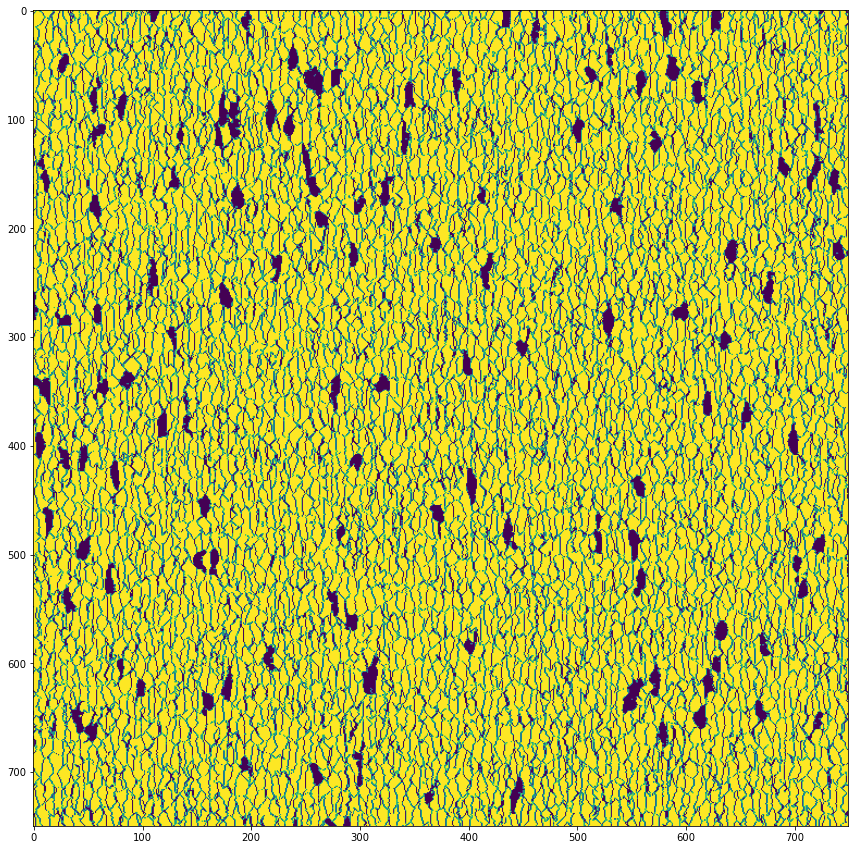

In [36]:
plt.figure(figsize = (15,15))
plt.imshow(gx, aspect=1)

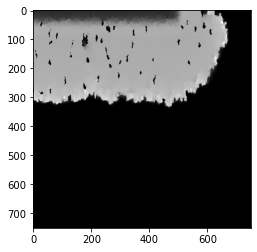

In [10]:
block = result_s1_s2[0].block2d()
img = block.get2d('membrane.V')[100]
plt.imshow(img, cmap='gray')

 #### 0%

In [2]:
# define model
model = myokit.load_model('atrial_test.mmt')
# define protocol
protocol = make_protocol(stim=1,
                         start_time=10,
                         duration=25,
                         period=330,
                         multiplier=2)
# define conductivity map
gx, gy = make_potts_map(g_in=1000, g_gap=500, g_bound=10, size_x=500, size_y=500)
# define simulation
simulation = make_simulation(model, protocol, gx, gy, npixels=(500, 500), step_size=0.005)

[1. 1. 1. ... 1. 1. 1.]


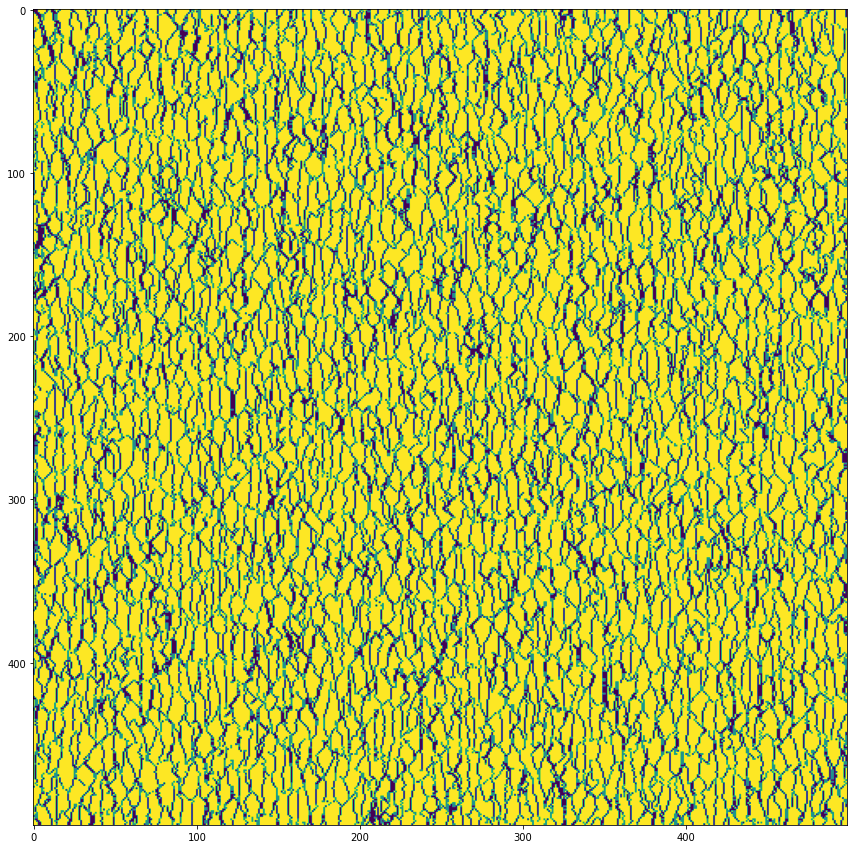

In [3]:
plt.figure(figsize = (15,15))
plt.imshow(gx, aspect=1)

In [4]:
time = protocol.characteristic_time()

result_s1_s2 = run_simulation(simulation, protocol, time=time, log_interval=1, s1s2=True, paced_y=40, paced_x=500, s2_paced_x=250, s2_paced_y=220, after_time=600)

In [5]:
visual(result_s1_s2, 'membrane.V', 'result_s1s2_0_per' )

#### No Potts

In [5]:
model = myokit.load_model('atrial_test.mmt')
# define protocol
protocol = make_protocol(stim=1,
                         start_time=10,
                         duration=25,
                         period=280,
                         multiplier=2)
# define conductivity map
gx, gy = make_isdomain_map(500, 500, gx=771, gy=500)
# define simulation
simulation = make_simulation(model, protocol, gx, gy, npixels=(500, 500), step_size=0.005)
time = protocol.characteristic_time()

In [6]:
result_iso = run_simulation(simulation, protocol, time=time, log_interval=1, s1s2=True, paced_y=40, paced_x=500, s2_paced_x=250, s2_paced_y=220, after_time=600)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [19]:
# from matplotlib.colors import Normalize

def visual(simulation_result, variable, path='results'):
    if not os.path.isdir(path):
        os.mkdir(path)
    i = 0
    for result in simulation_result:    
        block = result.block2d()
        imgs = block.get2d('membrane.V')
        for array in imgs:
            plt.imsave(f'{path}/{i}.png', array, cmap='gray', vmin=-100, vmax=50)
            i += 1

In [20]:
visual(result_iso, 'membrane.V', 'result_iso')

## Measure speed

### 0%

In [21]:
# define model
model = myokit.load_model('atrial_test.mmt')
# define protocol
protocol = make_protocol(stim=1,
                         start_time=10,
                         duration=25,
                         period=250,
                         multiplier=1)
# define conductivity map
gx, gy = make_potts_map(g_in=1000, g_gap=500, g_bound=10, size_x=500, size_y=500)
# define simulation
simulation = make_simulation(model, protocol, gx, gy, npixels=(500, 500), step_size=0.005)

time = protocol.characteristic_time()

result_speed_potts = run_simulation(simulation, protocol, time=time, log_interval=1, s1s2=False, paced_y=10, paced_x=500)

[1. 1. 1. ... 1. 1. 1.]


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [5]:
visual(result_speed_potts, 'membrane.V', 'result_speed_potts')

In [7]:
cond_velocity_2d(result_speed_potts, where=490, size=500)

0.7320385179452285

In [6]:
def cond_velocity_2d_hor(simulation_result, pix_size=0.0025, where=999, num_points=10, size=1000, treshold=-30):
    time_range = np.array(simulation_result[0]['environment.time'])
    v_array = np.array([np.array(simulation_result[0][f'{where}.{i}.membrane.V']) for i in range(0, size-1, size // num_points)])
    indecies = np.argmax(v_array >= treshold, axis=1)
    times = time_range[indecies]
    velocities = np.ones(times.shape[0]) * where * pix_size / times * 100
    if len(velocities[velocities > 0]) == 0:
        return 0
    return np.mean(velocities[velocities > 0])

In [8]:
# define model
model = myokit.load_model('atrial_test.mmt')
# define protocol
protocol = make_protocol(stim=1,
                         start_time=10,
                         duration=25,
                         period=250,
                         multiplier=1)
# define conductivity map
gx, gy = make_potts_map(g_in=1000, g_gap=500, g_bound=10, size_x=500, size_y=500)
# define simulation
simulation = make_simulation(model, protocol, gx, gy, npixels=(500, 500), step_size=0.005)

time = protocol.characteristic_time()

result_speed_potts = run_simulation(simulation, protocol, time=time, log_interval=1, s1s2=False, paced_y=500, paced_x=10)

[1. 1. 1. ... 1. 1. 1.]


In [9]:
visual(result_speed_potts, 'membrane.V', 'result_speed_potts_hor')

In [10]:
cond_velocity_2d_hor(result_speed_potts, where=490, size=500)

0.492543889691636

In [20]:
cond_velocity_2d(result_iso, where=490, size=500)

NameError: name 'result_iso' is not defined

### No Potts

In [ ]:
# define model
model = myokit.load_model('atrial_test.mmt')
# define protocol
protocol = make_protocol(stim=1,
                         start_time=10,
                         duration=25,
                         period=250,
                         multiplier=1)
# define conductivity map
gx, gy = make_isodomain_map(500, 500, gx=71, gy=47)
# define simulation
simulation = make_simulation(model, protocol, gx, gy, npixels=(500, 500), step_size=0.005)

time = protocol.characteristic_time()

result_speed_potts = run_simulation(simulation, protocol, time=time, log_interval=1, s1s2=False, paced_y=10, paced_x=500)